### Predicting Sequences using ARIMA, RNN, LSTM, XGBoost, Attention Networks

#### What we will do?

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from tldextract import extract
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils.dataframe import column as column_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from IPython.display import display, HTML


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb

np.set_printoptions(threshold=np.nan)




plt.rcParams["figure.figsize"] = (24,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import datetime
from scipy import signal
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn import linear_model



InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

/home/ahemf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


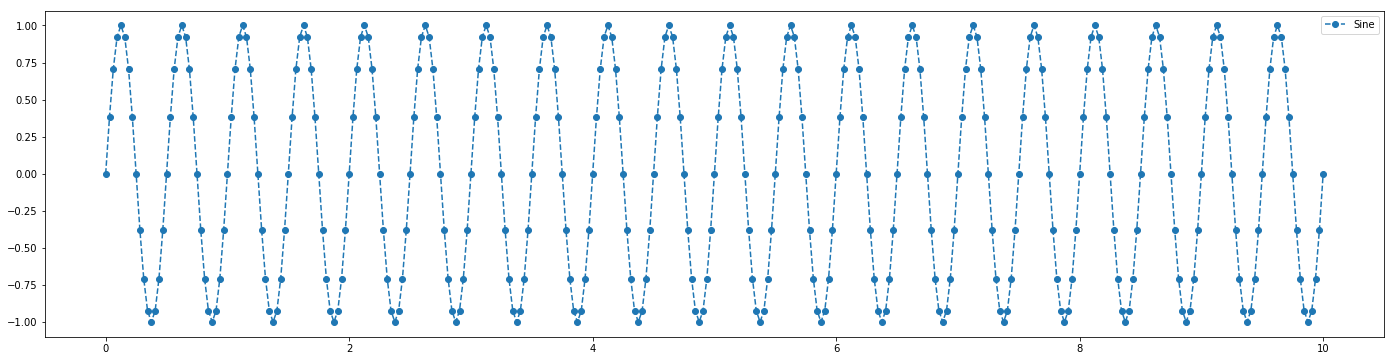

In [54]:
plt.rcParams["figure.figsize"] = (24,6)
fs = 2 # sample rate 
f = 2 # the waves of the signal

fs = max(16*f,fs)
x = np.arange(0,10+(1.0/fs),1.0/fs) # the points on the x axis for plotting

# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * i) for i in x]

p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
plt.legend(handles=[p1])
plt.show()

In [114]:
def build_simple_wave_gen(frequencies,trend_function=None,fs=None,jitter_process='guassian',jitter_stddev=0):
    fmax = max(frequencies)
    if fs is None:
        fs = 16*fmax
    fs = max(16*fmax,fs)
    def wave_gen(x=None,start=0,stop=None):
        
        if(x is None and start is None and stop is None and fs is None):
            raise ValueError("Please pass proper params")
        elif(x is None and start is not None and stop is not None):
            x=np.arange(start,stop+(1.0/fs),1.0/fs)
         

        y = np.array([ 0 for i in x])
        
        for f in frequencies:
            y = y + [ np.sin(2*np.pi*f * i) for i in x]
            

        ytrend=0

        if(trend_function is not None and callable(trend_function)):
            ytrend = [ trend_function(i) for i in x]

            

        yjit=0   
        if(jitter_stddev>1e-6):
            yjit = np.random.randn(len(x))*jitter_stddev
        yfull=y+yjit+ytrend
            

        return x,y,yfull
        
        
    return wave_gen
    

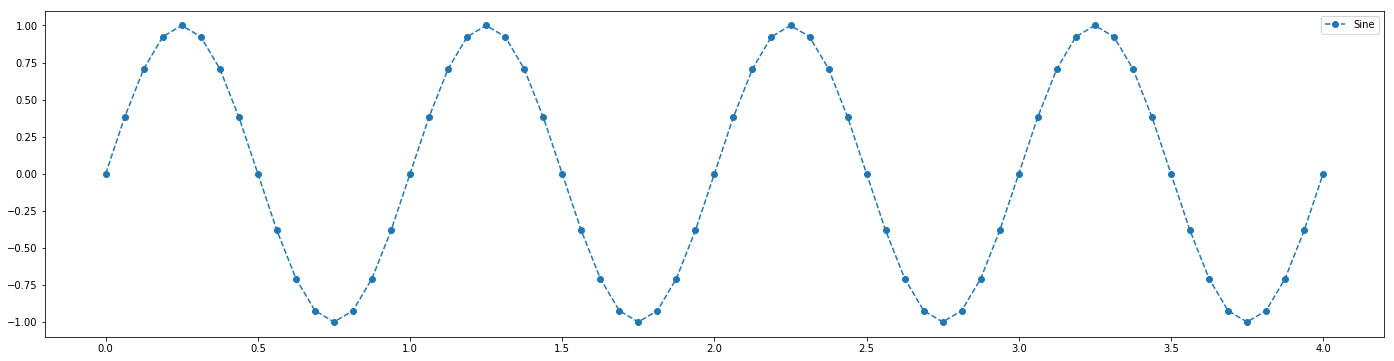

257

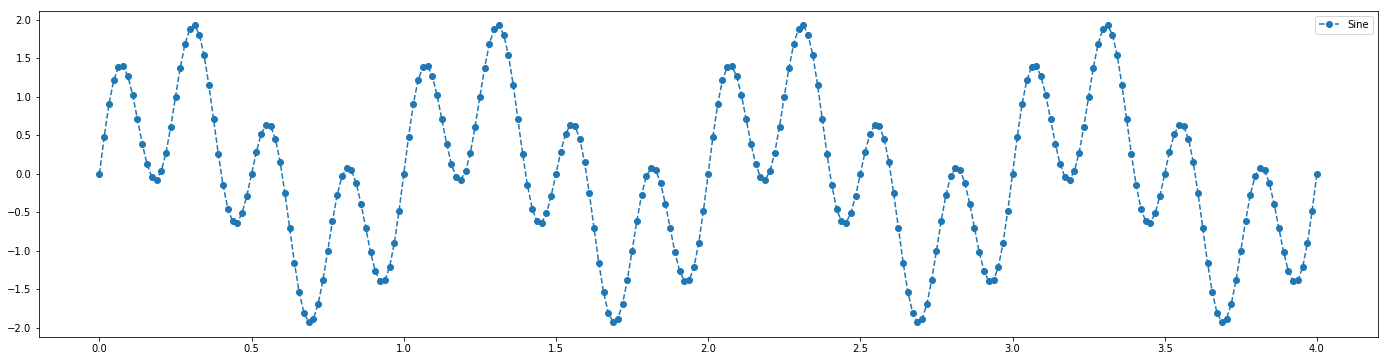

In [105]:
s1=build_simple_wave_gen([1],trend_function=None,fs=None,jitter_process='guassian',jitter_stddev=0)
s12=build_simple_wave_gen([1,4],trend_function=None,fs=None,jitter_process='guassian',jitter_stddev=0)
x,y,_=s1(stop=4)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
plt.legend(handles=[p1])
plt.show()
x,y,_=s12(stop=4)
len(y)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
plt.legend(handles=[p1])
plt.show()

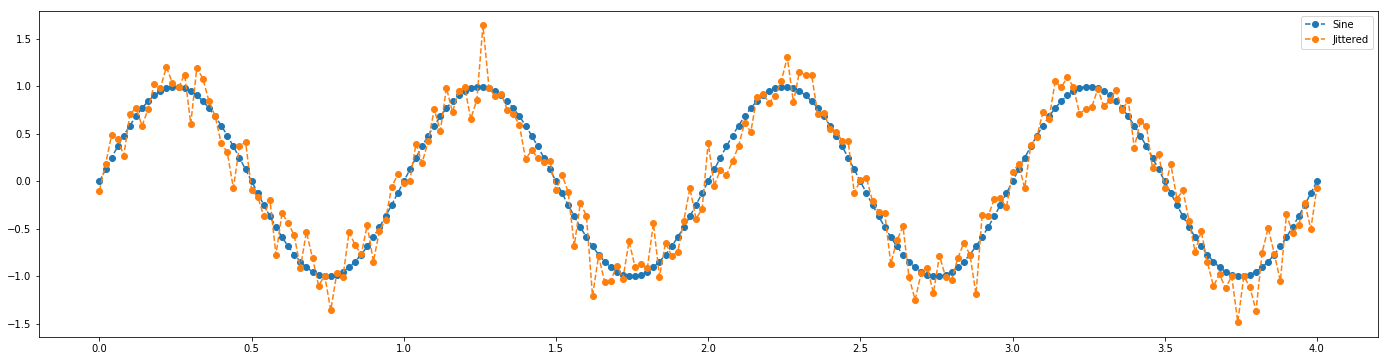

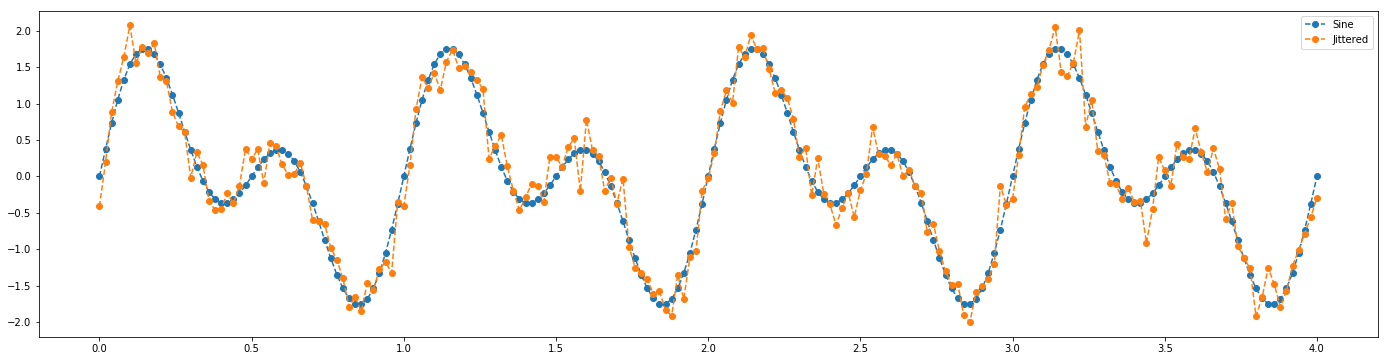

In [100]:
s1j=build_simple_wave_gen([1],trend_function=None,fs=50,jitter_process='guassian',jitter_stddev=0.2)
s12j=build_simple_wave_gen([1,2],trend_function=None,fs=50,jitter_process='guassian',jitter_stddev=0.2)
x,y,yf=s1j(stop=4)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
p2, = plt.plot(x,yf,label="Jittered",linestyle='--', marker='o')
plt.legend(handles=[p1,p2])
plt.show()
x,y,yf=s12j(stop=4)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
p2, = plt.plot(x,yf,label="Jittered",linestyle='--', marker='o')
plt.legend(handles=[p1,p2])
plt.show()

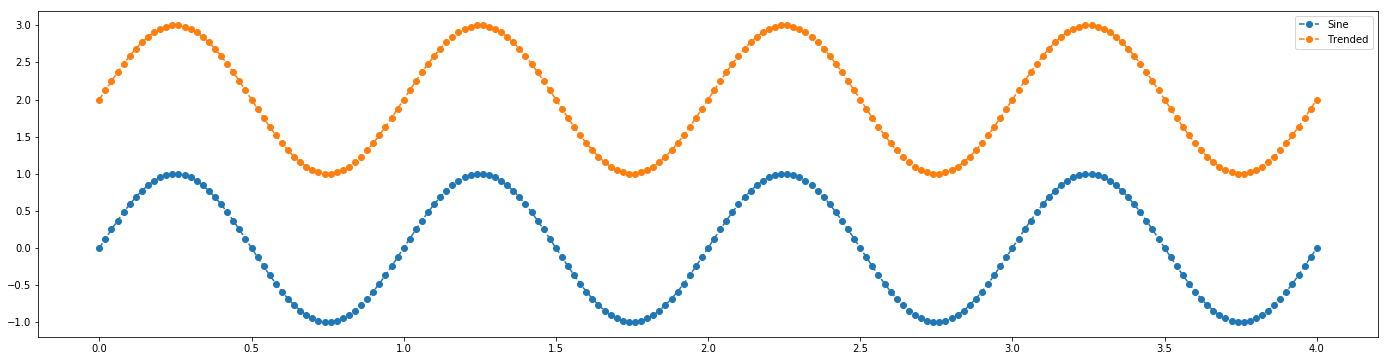

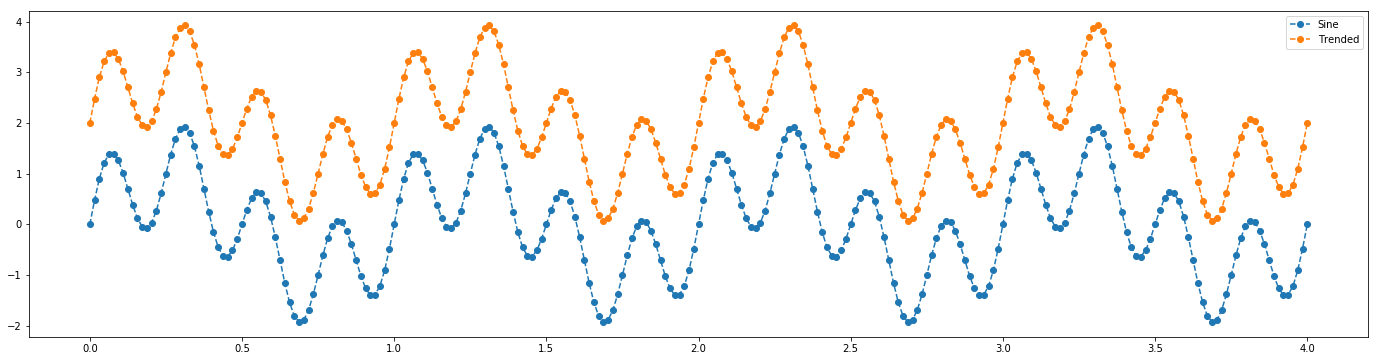

In [119]:
def xsq(x):
    return 2

s1j=build_simple_wave_gen([1],trend_function=xsq,fs=50,jitter_process='guassian',jitter_stddev=0)
s12j=build_simple_wave_gen([1,4],trend_function=xsq,fs=50,jitter_process='guassian',jitter_stddev=0)
x,y,yf=s1j(stop=4)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
p2, = plt.plot(x,yf,label="Trended",linestyle='--', marker='o')
plt.legend(handles=[p1,p2])
plt.show()
x,y,yf=s12j(stop=4)
p1, = plt.plot(x,y,label="Sine",linestyle='--', marker='o')
p2, = plt.plot(x,yf,label="Trended",linestyle='--', marker='o')
plt.legend(handles=[p1,p2])
plt.show()